In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Downloads/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.size

900

In [7]:
df.shape

(150, 6)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
temp=pd.DataFrame(index=df.columns)
temp['Data_Types']=df.dtypes
temp['Null_counts'] = df.isnull().sum()
temp['Unique_counts'] = df.nunique()

In [10]:
temp

,Data_Types,Null_counts,Unique_counts
Id,int64,0,150
SepalLengthCm,float64,0,35
SepalWidthCm,float64,0,23
PetalLengthCm,float64,0,43
PetalWidthCm,float64,0,22
Species,object,0,3


<AxesSubplot:xlabel='SepalLengthCm'>

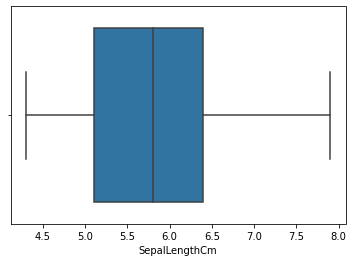

In [11]:
sns.boxplot(x=df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

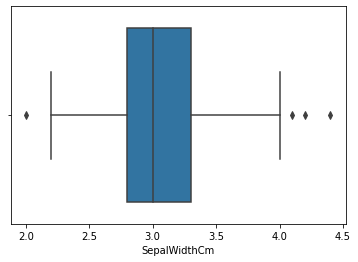

In [12]:
sns.boxplot(x=df['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

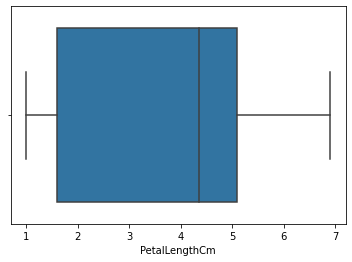

In [13]:
sns.boxplot(x=df['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

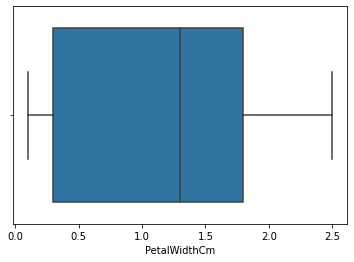

In [14]:
sns.boxplot(x=df['PetalWidthCm'])

In [15]:
Q1 = df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


In [16]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='SepalWidthCm'>

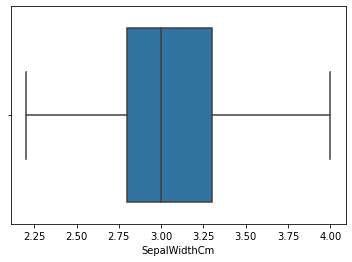

In [17]:
sns.boxplot(x=df1['SepalWidthCm'])

In [18]:
df1.shape

(146, 6)

In [19]:
df1.duplicated().sum()

0

In [20]:
df1['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64

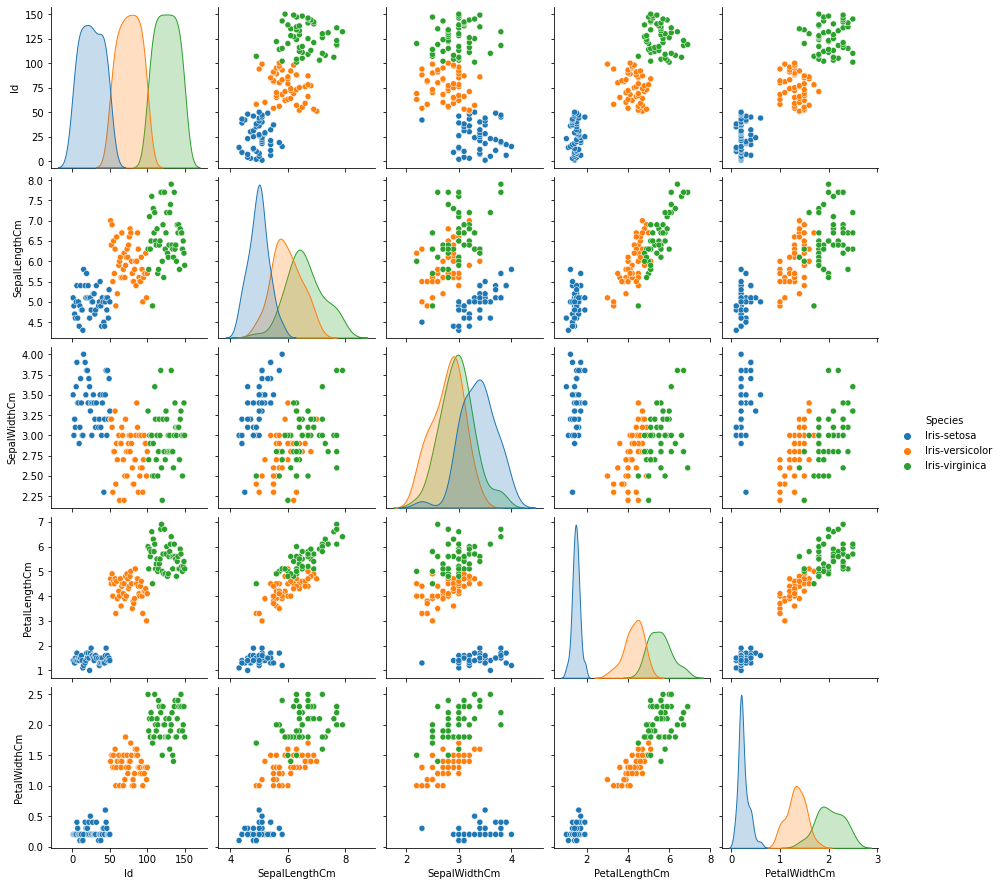

In [21]:
sns.pairplot(df1,hue='Species')

In [22]:
dic={'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}
df1.replace({'Species':dic},inplace=True)

In [23]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [24]:
x=df1.drop(['Species','Id'],axis=1)
y=df1['Species']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)

In [29]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [30]:
y_pred = dtree.predict(x_test)

In [31]:
y_pred

array([0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2],
      dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
acc

97.72727272727273

In [33]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[10,  0,  1],
       [ 0, 17,  0],
       [ 0,  0, 16]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       1.00      0.91      0.95        11\n           1       1.00      1.00      1.00        17\n           2       0.94      1.00      0.97        16\n\n    accuracy                           0.98        44\n   macro avg       0.98      0.97      0.97        44\nweighted avg       0.98      0.98      0.98        44\n'

In [35]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

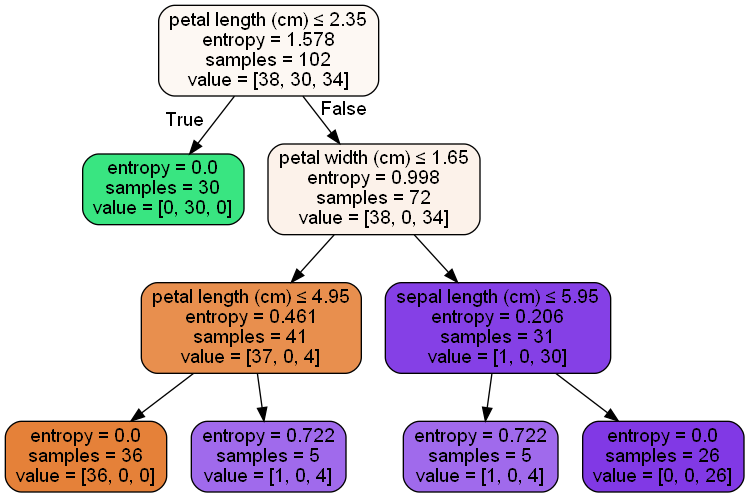

In [36]:
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())